# _`expression`_`.compose(e)`

The composition of two (two-tape) expressions.

Since Python 3.5, can also be written with the infix operator `@`: `e @ f` is syntactic sugar for `e.compose(f)`.

See also:
- [_automaton_.compose](automaton.compose.ipynb)
- [_expression_.automaton](expression.automaton.ipynb)
- [_expression_.derived_term](expression.derived_term.ipynb)
- [_expression_.inductive](expression.inductive.ipynb)
- [SACS-2017](SACS-2017.ipynb) – presents the algorithm to convert such an expression into an automaton.  Contains many examples.

## Examples

In [1]:
import vcsn
ctx1 = vcsn.context("lat<lan(ab), lan(jk)>, zmin")
ctx2 = vcsn.context("lat<lan(jk), lan(xy)>, zmin")

As a simple example, let's compose $a|j+b|j$ with $j|x + k|y$, convert this expression into an automaton, and then extract an expression from it.  In other words, let's build an extended expression, and eliminate its compose operator.

In [2]:
e1 = ctx1.expression('a|j + b|k')
e2 = ctx2.expression('j|x* + k|y*')
e = e1 @ e2
e

(a|j+b|k)@(j|x*+k|y*)

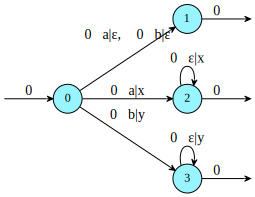

In [3]:
a = e.automaton()
a

In [4]:
a.expression()

a|\e+b|\e+(a|x)(\e|x)*+(b|y)(\e|y)*

Using `expression.automaton` (aka, `expression.derived_term`) on the composition of expressions often gives better results than composing the automata:

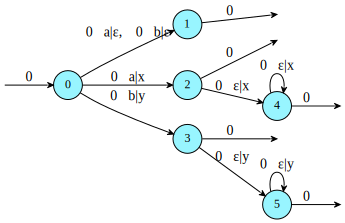

In [5]:
(e1.automaton() @ e2.automaton()).strip()

### Distance of Edition
In this example (taken from [SACS-2017](SACS-2017.ipynb) which was based on [mohri.2002.ciaa](References.ipynb#mohri.2002.ciaa)), we build a [Levenshtein automaton](context.levenshtein.ipynb) which can be used to compute the distance between words and/or languages.

We introduce two weighted expressions: the first one specifies the costs: _I_nserting or _S_uppressng a letter costs 1, but merely copying it is free (cost 0, left implicit).

In [6]:
ctx = vcsn.context("lat<lan(a-zIS), lan(a-zIS)>, zmin")
f1 = ctx.expression('([a-z] + ⟨1⟩(\e|I + [a-z]|S))∗'); f1

(a|a+b|b+c|c+d|d+e|e+f|f+g|g+h|h+i|i+j|j+k|k+l|l+m|m+n|n+o|o+p|p+q|q+r|r+s|s+t|t+u|u+v|v+w|w+x|x+y|y+z|z+<1>(\e|I+[^IS]|S))*

The second specifies what letters can be inserted, and what suppression means.

In [7]:
f2 = ctx.expression('([a-z] + I|[a-z] + S|\e)∗')
f2

(S|\e+a|a+b|b+c|c+d|d+e|e+f|f+g|g+h|h+i|i+j|j+k|k+l|l+m|m+n|n+o|o+p|p+q|q+r|r+s|s+t|t+u|u+v|v+w|w+x|x+y|y+z|z+I|[^IS])*

Finally, this expression is equivalent to the Levenshtein automaton (for these costs).

In [8]:
f = f1 @ f2
f

(a|a+b|b+c|c+d|d+e|e+f|f+g|g+h|h+i|i+j|j+k|k+l|l+m|m+n|n+o|o+p|p+q|q+r|r+s|s+t|t+u|u+v|v+w|w+x|x+y|y+z|z+<1>(\e|I+[^IS]|S))*@(S|\e+a|a+b|b+c|c+d|d+e|e+f|f+g|g+h|h+i|i+j|j+k|k+l|l+m|m+n|n+o|o+p|p+q|q+r|r+s|s+t|t+u|u+v|v+w|w+x|x+y|y+z|z+I|[^IS])*

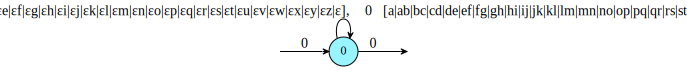

In [9]:
f.automaton()

The edit distance between train and plane is

In [10]:
(ctx.expression('train') @ f1 @ f2 @ ctx.expression('plane')).shortest(3)

<6>train|plane